In [11]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.timeseries import LombScargle
import astropy.units as u

In [2]:
#load the full mega target list
#had to move this to a separate directory because there were issues accessing the file from github
targets = pd.read_csv("C:\\Users\\smithlt\\Documents\\ASTR502\\ASTR502_Mega_Target_List.csv")

print(f"Loaded {len(targets)} total targets from CSV")
print(f"Columns available: {list(targets.columns)}")

# Check what mission sources we have
if 'mission_source' in targets.columns:
    print(f"\nMission sources in dataset:")
    print(targets['mission_source'].value_counts())
    
    # Filter for only Kepler targets
    kepler_targets = targets[targets['mission_source'] == 'Kepler'].copy()
    print(f"\nFound {len(kepler_targets)} Kepler targets!")
    
    if len(kepler_targets) > 0:
        print("\nFirst 5 Kepler targets:")
        for i, row in kepler_targets.head().iterrows():
            print(f"  {row['pl_name']}: {row['tic_id']}")
    else:
        print("No Kepler targets found in the dataset.")
        print("Let's check for targets that might have Kepler data...")
        
        # Look for targets that might have sy_kepmag (Kepler magnitude)
        if 'sy_kepmag' in targets.columns:
            kepler_mag_targets = targets[pd.notna(targets['sy_kepmag'])].copy()
            print(f"Found {len(kepler_mag_targets)} targets with Kepler magnitudes")
            if len(kepler_mag_targets) > 0:
                print("First 5 targets with Kepler magnitudes:")
                for i, row in kepler_mag_targets.head().iterrows():
                    print(f"  {row['pl_name']}: {row['tic_id']}, Kepler mag: {row['sy_kepmag']}")
                kepler_targets = kepler_mag_targets
else:
    print("No 'mission_source' column found. Let's look for other Kepler indicators...")
    
    # Look for targets that might have sy_kepmag
    if 'sy_kepmag' in targets.columns:
        kepler_targets = targets[pd.notna(targets['sy_kepmag'])].copy()
        print(f"Found {len(kepler_targets)} targets with Kepler magnitudes")
    else:
        print("No clear Kepler indicators found in the dataset.")
        kepler_targets = pd.DataFrame()

print(f"\nFinal Kepler target count: {len(kepler_targets)}")

# Test a few Kepler targets quickly to see what works
if len(kepler_targets) > 0:
    print("\nTesting search methods on first 5 Kepler targets...")
    test_sample = kepler_targets.head(5)
    
    working_kepler_targets = []
    
    for i, row in test_sample.iterrows():
        target_name = row['pl_name']
        tic_id = row['tic_id']
        
        print(f"\nTesting {target_name} ({tic_id}):")
        
        # Try different search strategies
        search_strategies = [
            f"{tic_id}",
            f"{tic_id}",
            target_name.split()[0] if len(target_name.split()) > 1 else target_name
        ]
        
        found_data = False
        for search_term in search_strategies:
            try:
                kepler_result = lk.search_lightcurve(search_term, author='Kepler')

                if len(kepler_result) > 0:
                    print(f"  ✓ '{search_term}': {len(kepler_result)} Kepler results")
                    working_kepler_targets.append({
                        'target_name': target_name,
                        'tic_id': tic_id,
                        'search_term': search_term,
                        'kepler_results': len(kepler_result),
                    })
                    found_data = True
                    break
                else:
                    print(f"  ✗ '{search_term}': No results")
            except Exception as e:
                print(f"  ✗ '{search_term}': Error - {e}")
        
        if not found_data:
            print(f"No data found for {target_name}")
    
    print(f"\n✓ Found {len(working_kepler_targets)} Kepler targets with available data")
    
    if working_kepler_targets:
        # DataFrame for processing
        kepler_star_df = pd.DataFrame(working_kepler_targets)
        print("\nReady to process these Kepler targets:")
        for i, row in kepler_star_df.iterrows():
            print(f"  {row['target_name']}: {row['search_term']} ({row['kepler_results']} Kepler)")
    else:
        print("No working Kepler targets found in the test sample")
else:
    print("No Kepler targets to test")

Loaded 4516 total targets from CSV
Columns available: ['pl_name', 'hostname', 'gaia_dr3_id', 'gaia_dr2_id', 'tic_id', 'hd_name', 'ra', 'dec', 'sy_vmag', 'sy_jmag', 'sy_kmag', 'sy_tmag', 'sy_kepmag', 'sy_gaiamag', 'st_teff', 'st_logg', 'st_met', 'st_mass', 'st_rad', 'st_spectype', 'st_lum', 'st_age', 'st_ageerr1', 'st_ageerr2', 'st_rotp', 'pl_orbper', 'pl_rade', 'pl_trandur', 'disc_facility', 'disc_year', 'mission_source']

Mission sources in dataset:
mission_source
Kepler    2762
TESS       717
K2         548
WASP       168
HAT        139
Other      105
CoRoT       34
NGTS        22
KELT        21
Name: count, dtype: int64

Found 2762 Kepler targets!

First 5 Kepler targets:
  Kepler-1629 b: TIC 351766445
  Kepler-1445 b: TIC 351766604
  Kepler-1286 b: TIC 351766517
  Kepler-1835 b: TIC 351799800
  Kepler-1341 b: TIC 123126460

Final Kepler target count: 2762

Testing search methods on first 3 Kepler targets...

Testing Kepler-1629 b (TIC 351766445):
  ✓ 'TIC 351766445': 18 Kepler resu


Processing target 1/5: Kepler-1629 b
TIC ID: TIC 351766445, Search term: TIC 351766445
Found 18 quarters of Kepler data
  Successfully downloaded Kepler lightcurve
  Time span: 120.5 - 130.2 days
  Data points: 473
  Clean data points: 469
  Flux range: 0.9933 to 1.0028
    Period analysis complete:
    Peak period: 6.3801 days
    Peak power: 0.7350
Amplitude (A): 0.0027


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


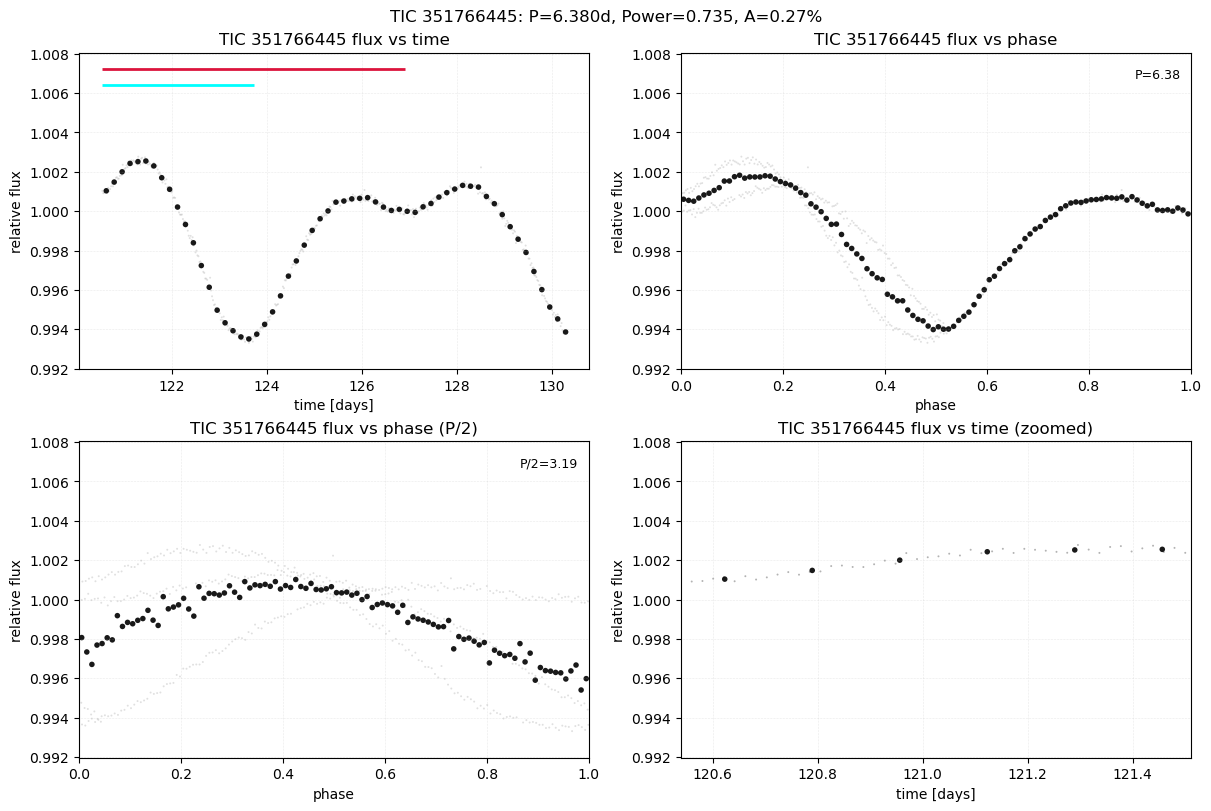


Processing target 2/5: Kepler-1445 b
TIC ID: TIC 351766604, Search term: TIC 351766604
Found 18 quarters of Kepler data
  Successfully downloaded Kepler lightcurve
  Time span: 120.5 - 130.2 days
  Data points: 473
  Clean data points: 469
  Flux range: 0.9997 to 1.0004
    Period analysis complete:
    Peak period: 10.5351 days
    Peak power: 0.1896
Amplitude (A): 0.0001


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


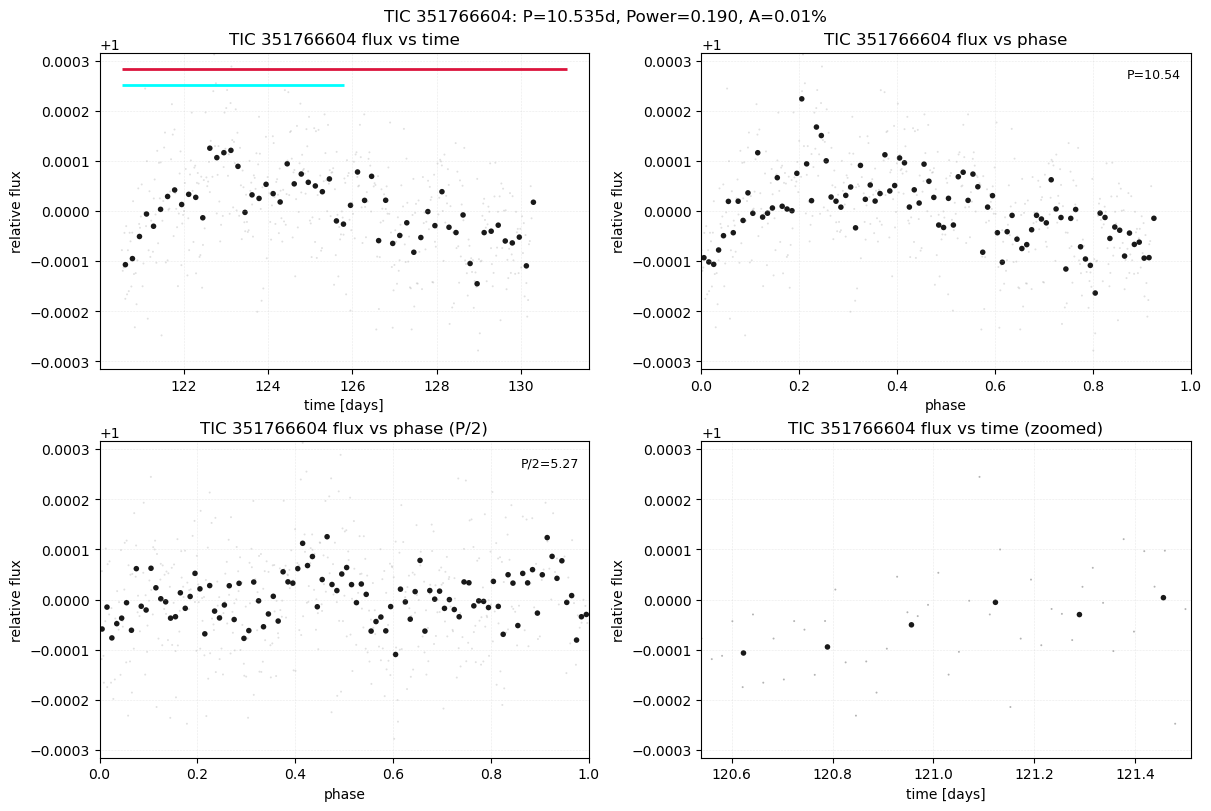


Processing target 3/5: Kepler-1286 b
TIC ID: TIC 351766517, Search term: TIC 351766517
Found 9 quarters of Kepler data
  Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean data points: 1624
  Flux range: 0.9981 to 1.0216
    Period analysis complete:
    Peak period: 20.6817 days
    Peak power: 0.0853
Amplitude (A): 0.0009


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


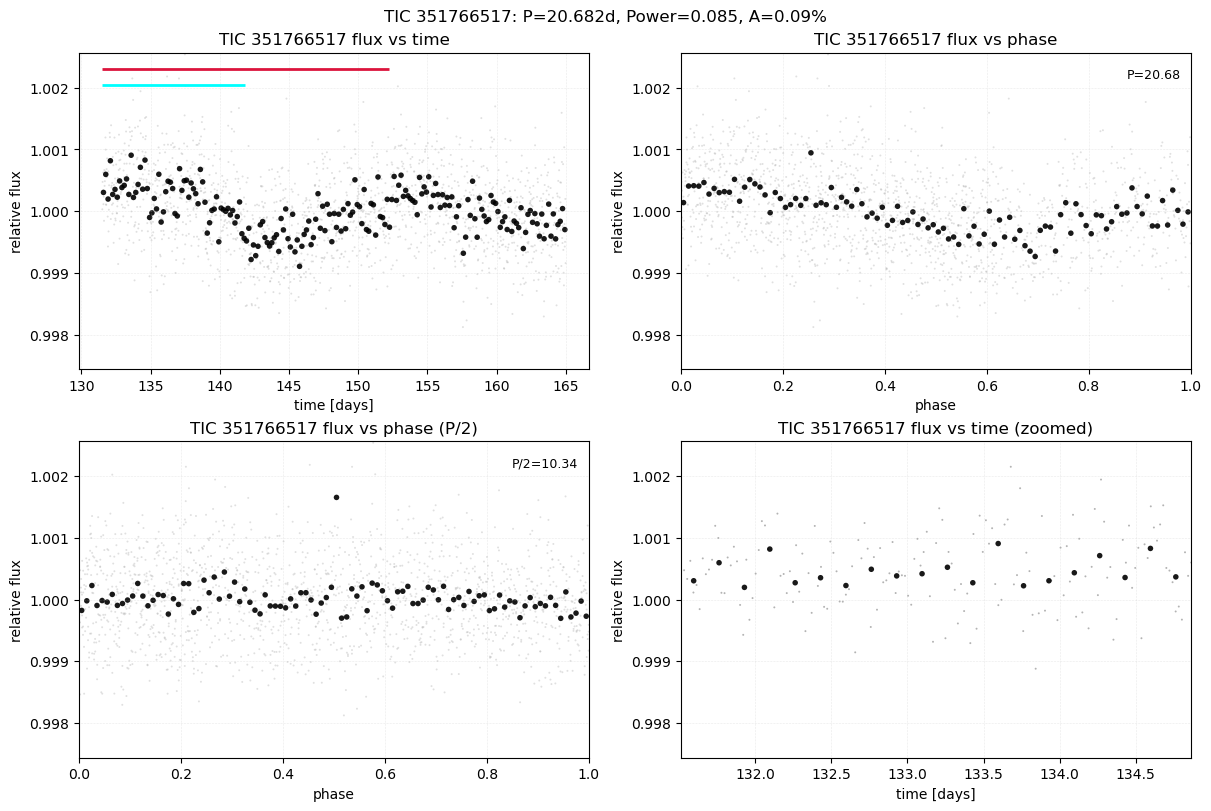


Processing target 4/5: Kepler-1835 b
TIC ID: TIC 351799800, Search term: TIC 351799800
Found 9 quarters of Kepler data
  Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean data points: 1624
  Flux range: 0.9978 to 1.0052
    Period analysis complete:
    Peak period: 80.0000 days
    Peak power: 0.0838
Amplitude (A): 0.0007


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


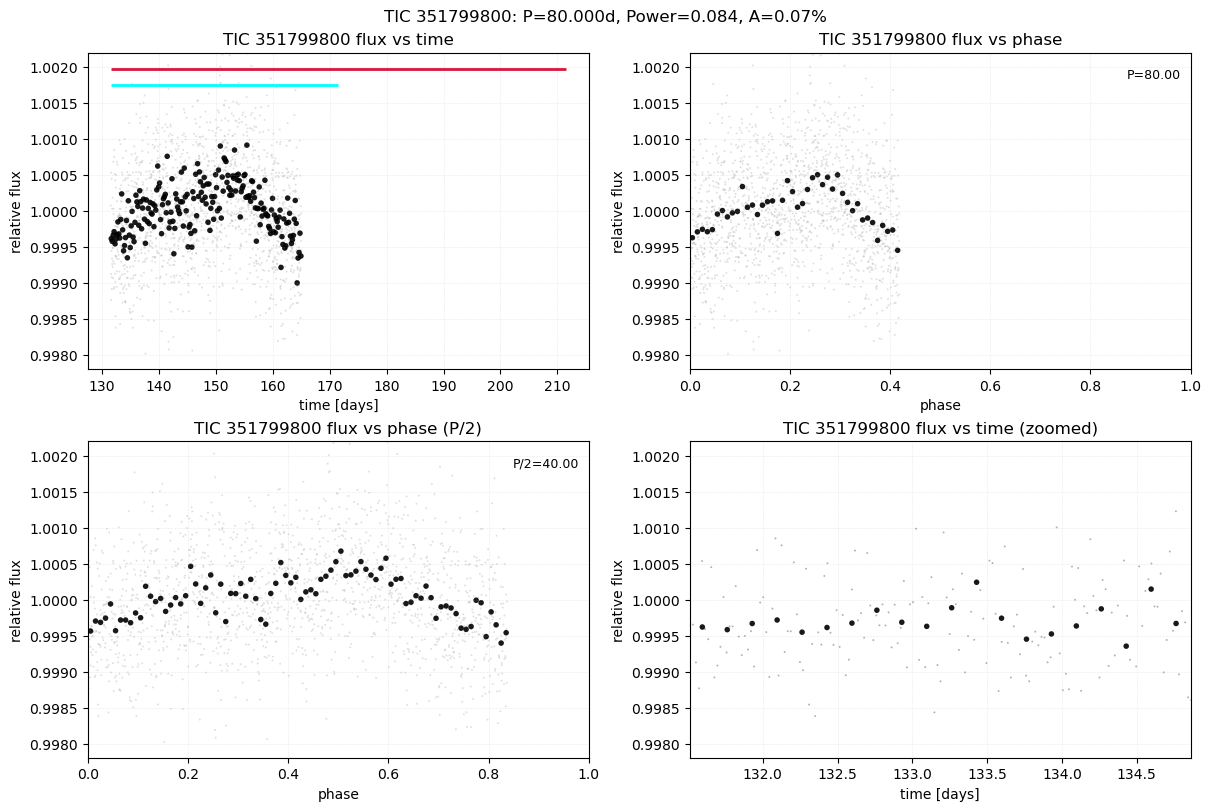


Processing target 5/5: Kepler-1341 b
TIC ID: TIC 123126460, Search term: TIC 123126460
Found 17 quarters of Kepler data
  Successfully downloaded Kepler lightcurve
  Time span: 131.5 - 165.0 days
  Data points: 1626
  Clean data points: 1624
  Flux range: 0.9952 to 1.0048
    Period analysis complete:
    Peak period: 23.5980 days
    Peak power: 0.8405
Amplitude (A): 0.0018


c:\Users\smithlt\miniconda3\envs\astr502\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


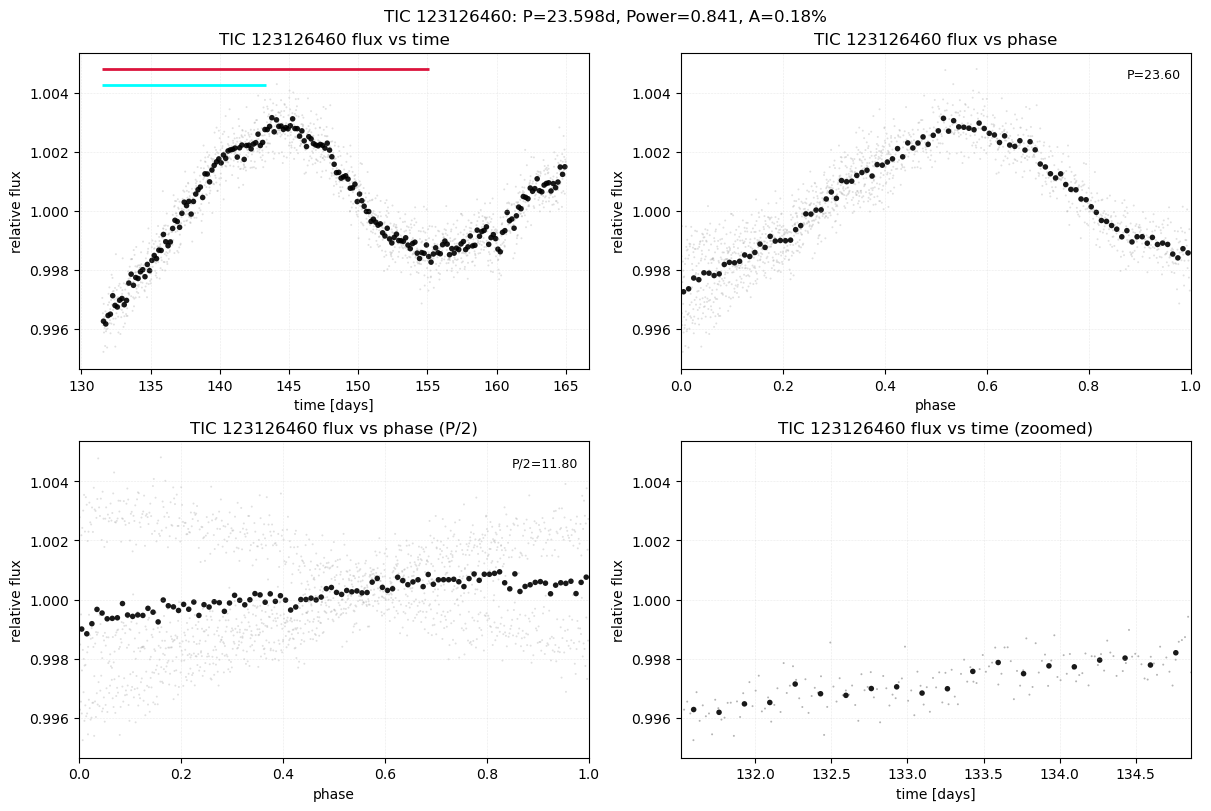

In [36]:
def _bin_series_fixed_width(x, y, width):
    if not np.isfinite(width) or width <= 0:
        return np.array([]), np.array([])
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    x_min = np.nanmin(x_valid)
    x_max = np.nanmax(x_valid)
    if not np.isfinite(x_min) or not np.isfinite(x_max):
        return np.array([]), np.array([])
    if x_min == x_max:
        edges = np.array([x_min, x_min + width])
    else:
        edges = np.arange(x_min, x_max + width, width)
        if edges.size < 2:
            edges = np.array([x_min, x_max])
    return _bin_series_by_edges(x_valid, y_valid, edges)

def _bin_series_by_edges(x, y, edges):
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    inds = np.digitize(x_valid, edges) - 1
    valid = (inds >= 0) & (inds < len(edges) - 1)
    if not valid.any():
        return np.array([]), np.array([])
    x_valid = x_valid[valid]
    y_valid = y_valid[valid]
    inds = inds[valid]
    centers = []
    values = []
    for idx in np.unique(inds):
        bin_mask = inds == idx
        if np.any(bin_mask):
            centers.append(0.5 * (edges[idx] + edges[idx + 1]))
            values.append(np.nanmean(y_valid[bin_mask]))
    return np.array(centers), np.array(values)


for i, row in kepler_star_df.iterrows():
    target_name = row['target_name'] 
    search_term = row['search_term']
    tic_id = row['tic_id']
        
    print(f"\n{'='*50}")
    print(f"Processing target {i+1}/{len(kepler_star_df)}: {target_name}")
    print(f"TIC ID: {tic_id}, Search term: {search_term}")
    
    # Initialize variables in case of errors
    peak_period = 1.0  # Default period
    peak_power = 0.1   # Default power
    time = np.array([])
    flux = np.array([])
    
    kepler_search = lk.search_lightcurve(search_term, author='Kepler')
            
    # Process Kepler data first
    if len(kepler_search) > 0:
        print(f"Found {len(kepler_search)} quarters of Kepler data")
        
        # Download first quarter only to keep it fast
        lc = kepler_search.download()
        
        if lc is not None:
            mission_name = 'Kepler'
            print(f"  Successfully downloaded Kepler lightcurve")
            print(f"  Time span: {lc.time.min().value:.1f} - {lc.time.max().value:.1f} days")
            print(f"  Data points: {len(lc.time)}")

            # Extract time and flux
            time = lc.time.value if hasattr(lc.time, "value") else np.asarray(lc.time)
            flux = lc.flux.value if hasattr(lc.flux, "value") else np.asarray(lc.flux)

            # Normalize flux (convert to relative flux)
            flux_median = np.nanmedian(flux)
            flux = flux / flux_median  # Now centered around 1.0

            # remove NaNs / infinities
            mask = np.isfinite(time) & np.isfinite(flux)
            time = time[mask]
            flux = flux[mask]
            
            print(f"  Clean data points: {len(time)}")
            print(f"  Flux range: {np.nanmin(flux):.4f} to {np.nanmax(flux):.4f}")

            if len(time) > 100:  #get enough points for analysis
                # Lomb-Scargle analysis
                freq, power = LombScargle(time, flux).autopower(
                    minimum_frequency=1/80, maximum_frequency=10
                )

                #find peak
                peak_freq = freq[np.argmax(power)]
                peak_period = 1/peak_freq
                peak_power = np.max(power)
                
                print(f"    Period analysis complete:")
                print(f"    Peak period: {peak_period:.4f} days")
                print(f"    Peak power: {peak_power:.4f}")
            else:
                print(f"Not enough clean data points ({len(time)})")
        else:
            print(f"Failed to download Kepler data")
    else:
        print(f"No Kepler data found")
        continue  #skip to next target
        
    #plot if we have data
    if len(time) == 0 or len(flux) == 0:
        print(f"No data to plot for {target_name}")
        continue
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
    ax_time = axes[0, 0]
    ax_phase = axes[0, 1]
    ax_two_phase = axes[1, 0]
    ax_zoom = axes[1, 1]
    
    #calculate amplitude from flux variation
    amp = np.std(flux) if len(flux) > 0 else 0.01
    print(f"Amplitude (A): {amp:.4f}")

    def _get_flux_ylim(best_amp_val, flux_vals):
        if len(flux_vals) == 0:
            return (0.98, 1.02)
        finite_flux = flux_vals[np.isfinite(flux_vals)]
        if finite_flux.size:
            f_med = np.nanmedian(finite_flux)
            f_std = np.nanstd(finite_flux)
            if not np.isfinite(f_std) or f_std == 0:
                f_std = 0.01
            return (f_med - 3 * f_std, f_med + 3 * f_std)
        return (0.98, 1.02)
    
    #plot 1: Time series
    ax_time.scatter(time, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_time.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_time.set_xlabel("time [days]")
    ax_time.set_ylabel("relative flux")
    ax_time.set_title(f"{tic_id} flux vs time")
    ax_time.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ylims_time = _get_flux_ylim(amp, flux)
    ax_time.set_ylim(ylims_time)

    #plot 2: Phase folded at detected period
    period = peak_period
    ylims_phase = _get_flux_ylim(amp, flux)
    if np.isfinite(period) and period > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period) / period
        ax_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_phase.set_xlim(0, 1)
        ax_phase.text(
            0.98,
            0.95,
            f"P={period:.2f}",
            transform=ax_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        ax_phase.set_ylim(ylims_phase)
        
        if ylims_time:
            y_line = ylims_time[1] - 0.05 * (ylims_time[1] - ylims_time[0])
            x_start = np.nanmin(time)
            x_end = x_start + period
            ax_time.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2, zorder=5)
    else:
        ax_phase.text(
            0.5,
            0.5,
            "No valid period",
            ha="center",
            va="center",
            transform=ax_phase.transAxes,
        )
        ax_phase.set_ylim(ylims_phase)
    ax_phase.set_xlabel("phase")
    ax_phase.set_ylabel("relative flux")
    ax_phase.set_title(f"{tic_id} flux vs phase")
    ax_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    #plot 3: Phase folded at half period (to check for double period)
    period_half = 0.5 * peak_period
    if np.isfinite(period_half) and period_half > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period_half) / period_half
        ax_two_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_two_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_two_phase.set_xlim(0, 1)
        ax_two_phase.text(
            0.98,
            0.95,
            f"P/2={period_half:.2f}",
            transform=ax_two_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        ax_two_phase.set_ylim(ylims_phase)

        if ylims_time:
            y_line = ylims_time[1] - 0.1 * (ylims_time[1] - ylims_time[0])
            x_start = np.nanmin(time)
            x_end = x_start + period_half
            ax_time.hlines(y_line, x_start, x_end, colors="cyan", linewidth=2, zorder=4)
    else:
        ax_two_phase.text(
            0.5,
            0.5,
            "No valid half period",
            ha="center",
            va="center",
            transform=ax_two_phase.transAxes,
        )
        ax_two_phase.set_ylim(ylims_phase)
    ax_two_phase.set_xlabel("phase")
    ax_two_phase.set_ylabel("relative flux")
    ax_two_phase.set_title(f"{tic_id} flux vs phase (P/2)")
    ax_two_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    #plot 4: Zoomed time series (first day)
    ax_zoom.scatter(time, flux, s=2, color="0.7", alpha=1, edgecolor="none")
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_zoom.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_zoom.set_xlabel("time [days]")
    ax_zoom.set_ylabel("relative flux")
    ax_zoom.set_title(f"{tic_id} flux vs time (zoomed)")
    ax_zoom.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ax_zoom.set_ylim(ylims_time)
    
    # Set zoom window to first few days
    if len(time) > 0:
        t_start = np.nanmin(time)
        zoom_window = min(5.0, (np.nanmax(time) - t_start) * 0.1)  # 5 days or 10% of data
        ax_zoom.set_xlim(t_start, t_start + zoom_window)

        # Add period indicators in the zoom window
        if ylims_time and np.isfinite(peak_period):
            y_line = ylims_time[0] + 0.05 * (ylims_time[1] - ylims_time[0])
            
            # Show one full period
            x_start = t_start + 0.5
            x_end = x_start + peak_period
            if x_end <= t_start + zoom_window:
                ax_zoom.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2, label=f"P={peak_period:.2f}d")
            
            # Show half period
            x_end_half = x_start + 0.5 * peak_period
            if x_end_half <= t_start + zoom_window:
                ax_zoom.hlines(y_line - 0.02 * (ylims_time[1] - ylims_time[0]), x_start, x_end_half, colors="cyan", linewidth=2, label=f"P/2={0.5*peak_period:.2f}d")
    
    fig.suptitle(
        f"{tic_id}: P={peak_period:.3f}d, Power={peak_power:.3f}, A={amp * 100:.2f}%",
        fontsize=12,
    )

    plt.savefig(f'C:/Users/smithlt/Documents/ASTR502/vetted_plot_{tic_id}.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

In [ ]:
def _bin_series_fixed_width(x, y, width):
    if not np.isfinite(width) or width <= 0:
        return np.array([]), np.array([])
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    x_min = np.nanmin(x_valid)
    x_max = np.nanmax(x_valid)
    if not np.isfinite(x_min) or not np.isfinite(x_max):
        return np.array([]), np.array([])
    if x_min == x_max:
        edges = np.array([x_min, x_min + width])
    else:
        edges = np.arange(x_min, x_max + width, width)
        if edges.size < 2:
            edges = np.array([x_min, x_max])
    return _bin_series_by_edges(x_valid, y_valid, edges)

def _bin_series_by_edges(x, y, edges):
    x_arr = np.asarray(x, dtype=float)
    y_arr = np.asarray(y, dtype=float)
    mask = np.isfinite(x_arr) & np.isfinite(y_arr)
    if not mask.any():
        return np.array([]), np.array([])
    x_valid = x_arr[mask]
    y_valid = y_arr[mask]
    inds = np.digitize(x_valid, edges) - 1
    valid = (inds >= 0) & (inds < len(edges) - 1)
    if not valid.any():
        return np.array([]), np.array([])
    x_valid = x_valid[valid]
    y_valid = y_valid[valid]
    inds = inds[valid]
    centers = []
    values = []
    for idx in np.unique(inds):
        bin_mask = inds == idx
        if np.any(bin_mask):
            centers.append(0.5 * (edges[idx] + edges[idx + 1]))
            values.append(np.nanmean(y_valid[bin_mask]))
    return np.array(centers), np.array(values)


for i, row in kepler_star_df.iterrows():
    target_name = row['target_name'] 
    search_term = row['search_term']
    tic_id = row['tic_id']
        
    print(f"\n{'='*50}")
    print(f"Processing target {i+1}/{len(kepler_star_df)}: {target_name}")
    print(f"TIC ID: {tic_id}, Search term: {search_term}")
    
    kepler_search = lk.search_lightcurve(search_term, author='Kepler')
            
    # Process Kepler data first if available
    if len(kepler_search) > 0:
        print(f"Found {len(kepler_search)} quarters of Kepler data")
        
        # Download first quarter only to keep it fast
        lc = kepler_search.download()
        
        if lc is not None:
            mission_name = 'Kepler'
            print(f"✓ Successfully downloaded Kepler lightcurve")
            print(f"  Time span: {lc.time.min().value:.1f} - {lc.time.max().value:.1f} days")
            print(f"  Data points: {len(lc.time)}")


            time = lc.time.value if hasattr(lc.time, "value") else np.asarray(lc.time)
            flux = lc.flux.value if hasattr(lc.flux, "value") else np.asarray(lc.flux)

            # remove NaNs / infinities
            mask = np.isfinite(time) & np.isfinite(flux)
            clean_time = time[mask]
            clean_flux = flux[mask]
            print(f"  Clean time data points: {clean_time}")
            print(f"  Clean flux data points: {clean_flux}")

            if len(clean_time) > 100:  #get enough points for analysis
                    print(f"  Clean data points: {len(clean_time)}")
                        
                    # Lomb-Scargle analysis
                    freq, power = LombScargle(clean_time, clean_flux).autopower(
                        minimum_frequency=1/80, maximum_frequency=10
                    )

                    #find peak
                    peak_freq = freq[np.argmax(power)]
                    peak_period = 1/peak_freq
                    peak_power = np.max(power)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
    ax_time = axes[0, 0]
    ax_phase = axes[0, 1]
    ax_two_phase = axes[1, 0]
    ax_zoom = axes[1, 1]
    amp = np.abs(peak_power)
    print(f"Amplitude (A): {amp:.2f}")
    #sector = lc.sector

    def _get_flux_ylim(best_amp_val, flux_vals):
        if np.isfinite(best_amp_val) and best_amp_val > 0:
            return (1 - 5 * best_amp_val, 1 + 5 * best_amp_val)
        finite_flux = flux_vals[np.isfinite(flux_vals)]
        if finite_flux.size:
            f_med = np.nanmedian(finite_flux)
            f_std = np.nanstd(finite_flux)
            if not np.isfinite(f_std) or f_std == 0:
                f_std = 0.1 * abs(f_med) if f_med else 1.0
            return (f_med - 5 * f_std, f_med + 5 * f_std)
        return None
    
    ax_time.scatter(time, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_time.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_time.set_xlabel("time [days]")
    ax_time.set_ylabel("flux")
    ax_time.set_title(f"{tic_id} flux vs time")
    ax_time.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ylims_time = _get_flux_ylim(amp, flux)
    ax_time.set_ylim(ylims_time)

    ####
    
    period = peak_period
    ylims_phase = _get_flux_ylim(amp, flux)
    if np.isfinite(period) and period > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period) / period
        ax_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_phase.set_xlim(0, 1)
        ax_phase.text(
            0.98,
            0.95,
            f"P={period:.2f}",
            transform=ax_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        if ylims_phase:
            ax_phase.set_ylim(ylims_phase)
        if ylims_time:
            y_line = ylims_time[1] - 0.05 * (ylims_time[1] - ylims_time[0])
        else:
            y_line = ax_time.get_ylim()[1]
        x_start = np.nanmin(time)
        x_end = x_start + period
        ax_time.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2, zorder=5)
    else:
        ax_phase.text(
            0.5,
            0.5,
            "No valid first_period",
            ha="center",
            va="center",
            transform=ax_phase.transAxes,
        )
        if ylims_phase:
            ax_phase.set_ylim(ylims_phase)
    ax_phase.set_xlabel("phase")
    ax_phase.set_ylabel("flux")
    ax_phase.set_title(f"{tic_id} flux vs phase")
    ax_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    #####
    
    
    
    period = 0.5*peak_period
    ylims_phase = _get_flux_ylim(amp, flux)
    if np.isfinite(period) and period > 0:
        time0 = np.nanmin(time)
        phase = np.mod(time - time0, period) / period
        ax_two_phase.scatter(phase, flux, s=2, color="0.7", alpha=0.4, edgecolor="none", linewidths=0)
        phase_edges = np.linspace(0, 1, 101)
        binned_phase, binned_phase_flux = _bin_series_by_edges(phase, flux, phase_edges)
        if binned_phase.size:
            ax_two_phase.scatter(
                binned_phase,
                binned_phase_flux,
                s=16,
                color="k",
                alpha=0.9,
                edgecolor="none",
                linewidths=0,
            )
        ax_two_phase.set_xlim(0, 1)
        ax_two_phase.text(
            0.98,
            0.95,
            f"P={period:.2f}",
            transform=ax_two_phase.transAxes,
            ha="right",
            va="top",
            fontsize=9,
            color="k",
        )
        if ylims_phase:
            ax_two_phase.set_ylim(ylims_phase)
        if ylims_time:
            y_line = ylims_time[1] - 0.05 * (ylims_time[1] - ylims_time[0])
        else:
            y_line = ax_time.get_ylim()[1]

        x_start = np.nanmin(time)
        x_end = x_start + period
        ax_time.hlines(y_line, x_start, x_end, colors="cyan", linewidth=2, zorder=10)
        ax_time.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2)
    else:
        ax_two_phase.text(
            0.5,
            0.5,
            "No valid first_period",
            ha="center",
            va="center",
            transform=ax_two_phase.transAxes,
        )
        if ylims_phase:
            ax_two_phase.set_ylim(ylims_phase)
    ax_two_phase.set_xlabel("phase")
    ax_two_phase.set_ylabel("flux")
    ax_two_phase.set_title(f"{tic_id} flux vs phase")
    ax_two_phase.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    
    ####
    
    ax_zoom.scatter(time, flux, s=2, color="0.7", alpha=1, edgecolor="none")
    bin_width_days = 4.0 / 24.0
    binned_time, binned_flux = _bin_series_fixed_width(time, flux, bin_width_days)
    if binned_time.size:
        ax_zoom.scatter(
            binned_time,
            binned_flux,
            s=16,
            color="k",
            alpha=0.9,
            edgecolor="none",
            linewidths=0,
        )
    ax_zoom.set_xlabel("time [days]")
    ax_zoom.set_ylabel("flux")
    ax_zoom.set_title(f"{tic_id} flux vs time")
    ax_zoom.grid(True, which="both", ls=":", lw=0.4, alpha=0.5)
    ylims_time = _get_flux_ylim(amp, flux)
    ax_zoom.set_ylim(ylims_time)
    ax_zoom.set_xlim(time[0], time[0] + 1)

    x_end = np.nanmax(time[0] + 1)
    x_start = x_end - 2*peak_period
    ax_zoom.hlines(y_line, x_start, x_end, colors="cyan", linewidth=2)

    x_start = np.nanmax(time[0])
    x_end = x_start + peak_period
    ax_zoom.hlines(y_line, x_start, x_end, colors="crimson", linewidth=2)
    
    
    fig.suptitle(
        f"{tic_id}, P={peak_period:.2f}, 2xP={2*peak_period:.2f},Φ={peak_power:.3f}, A={amp * 100:.2f}%",
        fontsize=12,
    )
    #adop_p={adopted_period:.2f}",

    plt.savefig('C:/Users/smithlt/Documents/ASTR502/vetted_plots.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()